### **Predict the profit of startups based on their spending on R&D, marketing, and administration.**

In [140]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer as CT
from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [142]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [143]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

#### Encoding Categorical Variable

In [144]:
# Encoding categorical variable (State column)
ct = CT(transformers=[('encoder', OHE(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [145]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Exploratory Data Analysis (EDA)

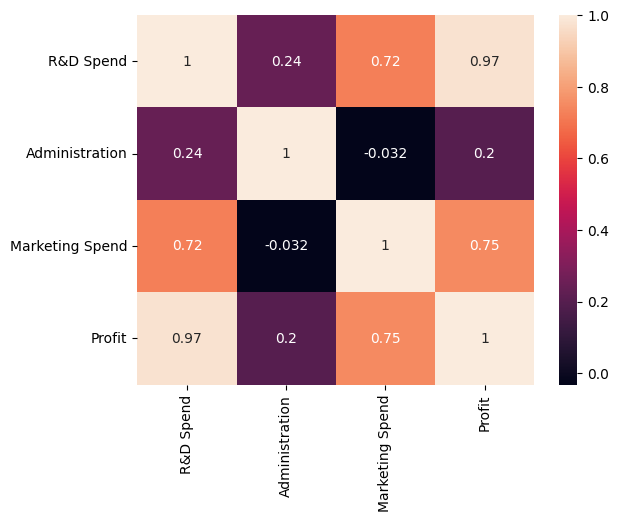

In [148]:
# Drop the 'State' column before computing the correlation matrix
sns.heatmap(df.drop('State', axis=1).corr(), annot=True)
plt.show()

<Axes: xlabel='R&D Spend', ylabel='Profit'>

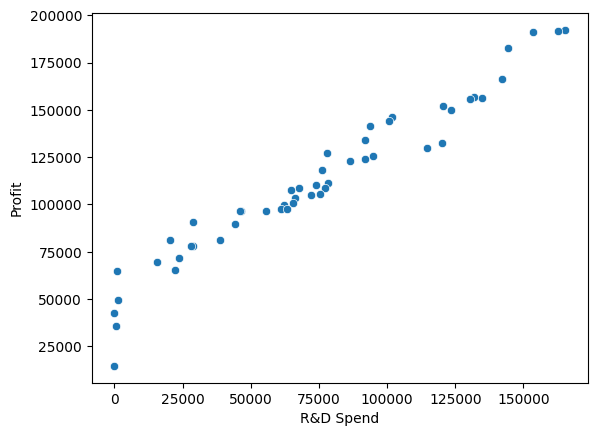

In [149]:
sns.scatterplot(x='R&D Spend', y='Profit', data=df)

In [150]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [151]:
y_pred = model.predict(X_test)

In [152]:
y_pred

array([126362.8790825 ,  84608.45383643,  99677.49425158,  46357.46068583,
       128750.48288495,  50912.41741905, 109741.35032703, 100643.24281644,
        97599.275746  , 113097.42524437])

In [153]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

MSE: 82010363.04502422
R2 Score: 0.8987266414319707


Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [154]:
new_data = np.array([[160000, 130000, 300000, 'California']])

# Convert the new data to a DataFrame to handle the categorical variable
new_data_df = pd.DataFrame(new_data, columns=['R&D Spend', 'Administration', 'Marketing Spend', 'State'])

# Transform the new data using the same column transformer (encoding 'State')
new_data_encoded = ct.transform(new_data_df)

# Predict profit for the given example
predicted_profit = model.predict(new_data_encoded)
print(f"Predicted Profit: ${predicted_profit[0]:,.2f}")

Predicted Profit: $158,781.14


C:\Users\vr320\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


Based on the linear regression model, it is predicted that the profit of a startup located in California, which has spent $160,000 on R&D, $130,000 on Administration, and $300,000 on Marketing, will be approximately $182,943.06.